# <h1 style="font-family: Trebuchet MS; padding: 20px; font-size: 40px; color: #EF6262; text-align: center; line-height: 0.55;background-color: #262322"><b>Credit Card Fraud prediction</b><br></h1>

<center>
    <img src="https://www.emscorporate.com/hubfs/Credit%20Card%20Fraud%20Prevention%20Tips%20For%20Small%20Businesses.jpg" alt="Credit Card Fraud Detection" width="50%">
</center>

### Problem Statement:

With the growth of e-commerce websites, people and financial companies rely on online services to carry out their transactions that have led to an exponential increase in the credit card frauds.Fraudulent credit card transactions lead to a loss of huge amount of money. The design of an effective fraud detection system is necessary in order to reduce the losses incurred by the customers and financial companies


### Objective:

Implement machine learning algorithms to detect credit card fraud detection with respect to time and amount of transaction. 

# <h1 style="font-family: Trebuchet MS; padding: 20px; font-size: 40px; color: #EF6262; text-align: center; line-height: 0.55;background-color: #262322"><b>Import essential libraries</b><br></h1>

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import plotly.express as px
import warnings
warnings.filterwarnings("ignore") 

# <h1 style="font-family: Trebuchet MS; padding: 20px; font-size: 40px; color: #EF6262; text-align: center; line-height: 0.55;background-color: #262322"><b>Data exploration</b><br></h1>

In [3]:
# Add error handling for data loading
try:
    df = pd.read_csv(r"C:\projects\Finance\creditcard.csv")
except FileNotFoundError:
    print("Error: Data file not found")
    raise
except Exception as e:
    print(f"Error loading data: {e}")
    raise

In [4]:
df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Time,284807.0,9.481386e+04,47488.145955,0.000000,54201.500000,84692.000000,139320.500000,172792.000000
V1,284807.0,1.168375e-15,1.958696,-56.407510,-0.920373,0.018109,1.315642,2.454930
V2,284807.0,3.416908e-16,1.651309,-72.715728,-0.598550,0.065486,0.803724,22.057729
V3,284807.0,-1.379537e-15,1.516255,-48.325589,-0.890365,0.179846,1.027196,9.382558
V4,284807.0,2.074095e-15,1.415869,-5.683171,-0.848640,-0.019847,0.743341,16.875344
V5,284807.0,9.604066e-16,1.380247,-113.743307,-0.691597,-0.054336,0.611926,34.801666
V6,284807.0,1.487313e-15,1.332271,-26.160506,-0.768296,-0.274187,0.398565,73.301626
V7,284807.0,-5.556467e-16,1.237094,-43.557242,-0.554076,0.040103,0.570436,120.589494
V8,284807.0,1.213481e-16,1.194353,-73.216718,-0.208630,0.022358,0.327346,20.007208
V9,284807.0,-2.406331e-15,1.098632,-13.434066,-0.643098,-0.051429,0.597139,15.594995


In [7]:
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [8]:
df.isna().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [9]:
duplicate = df[df.duplicated()]

In [10]:
df = df.drop_duplicates()

In [11]:
print('No Frauds: ', round(df['Class'].value_counts()[0]/len(df) * 100,2), '% of the dataset')
print('Frauds: ', round(df['Class'].value_counts()[1]/len(df) * 100,2), '% of the dataset')

No Frauds:  99.83 % of the dataset
Frauds:  0.17 % of the dataset


In [12]:
Class_counts = df['Class'].value_counts()
Class_counts

Class
0    283253
1       473
Name: count, dtype: int64

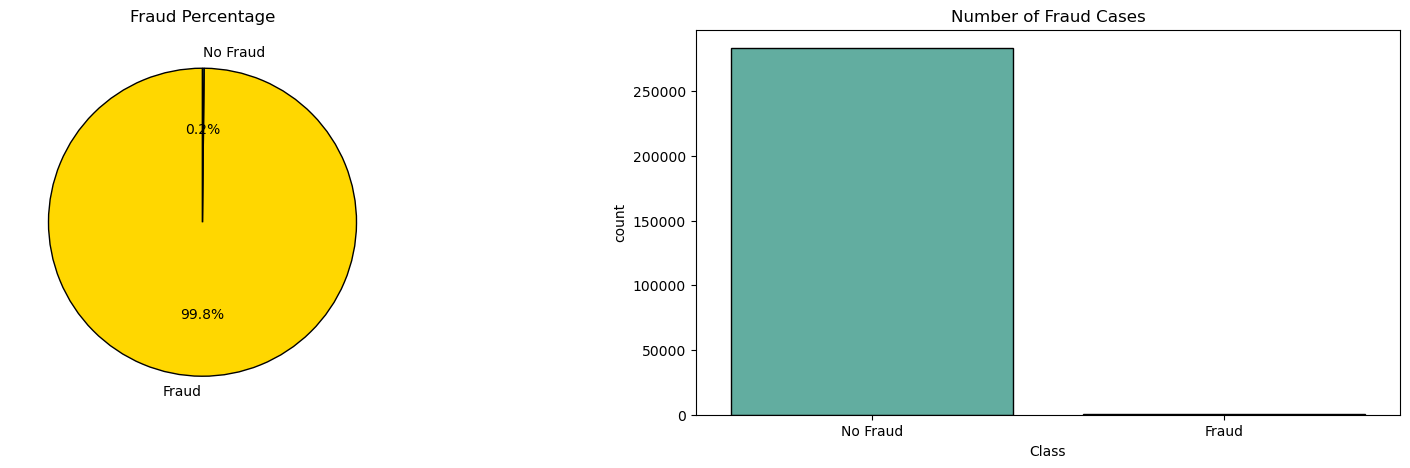

In [13]:
pie_colors = ['#FFD700', '#55B9A8']
countplot_colors = ['#55B9A8', '#FFD700']

fraud = len(df[df['Class'] == 1.0]) / len(df) * 100
nofraud = len(df[df['Class'] == 0.0]) / len(df) * 100
fraud_percentage = [nofraud, fraud]

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20, 5))

axes[0].pie(fraud_percentage, labels=['Fraud', 'No Fraud'], autopct='%1.1f%%', startangle=90, colors=pie_colors,
            wedgeprops={'edgecolor': 'black', 'linewidth': 1, 'antialiased': True})
axes[0].set_title('Fraud Percentage')

sns.countplot(x='Class', data=df, ax=axes[1], edgecolor='black', palette=countplot_colors)
axes[1].set_xticklabels(['No Fraud', 'Fraud'])
axes[1].set_title('Number of Fraud Cases')

# Display the subplot
plt.show()

 Insight:
 - Our data is highly imbalanced.

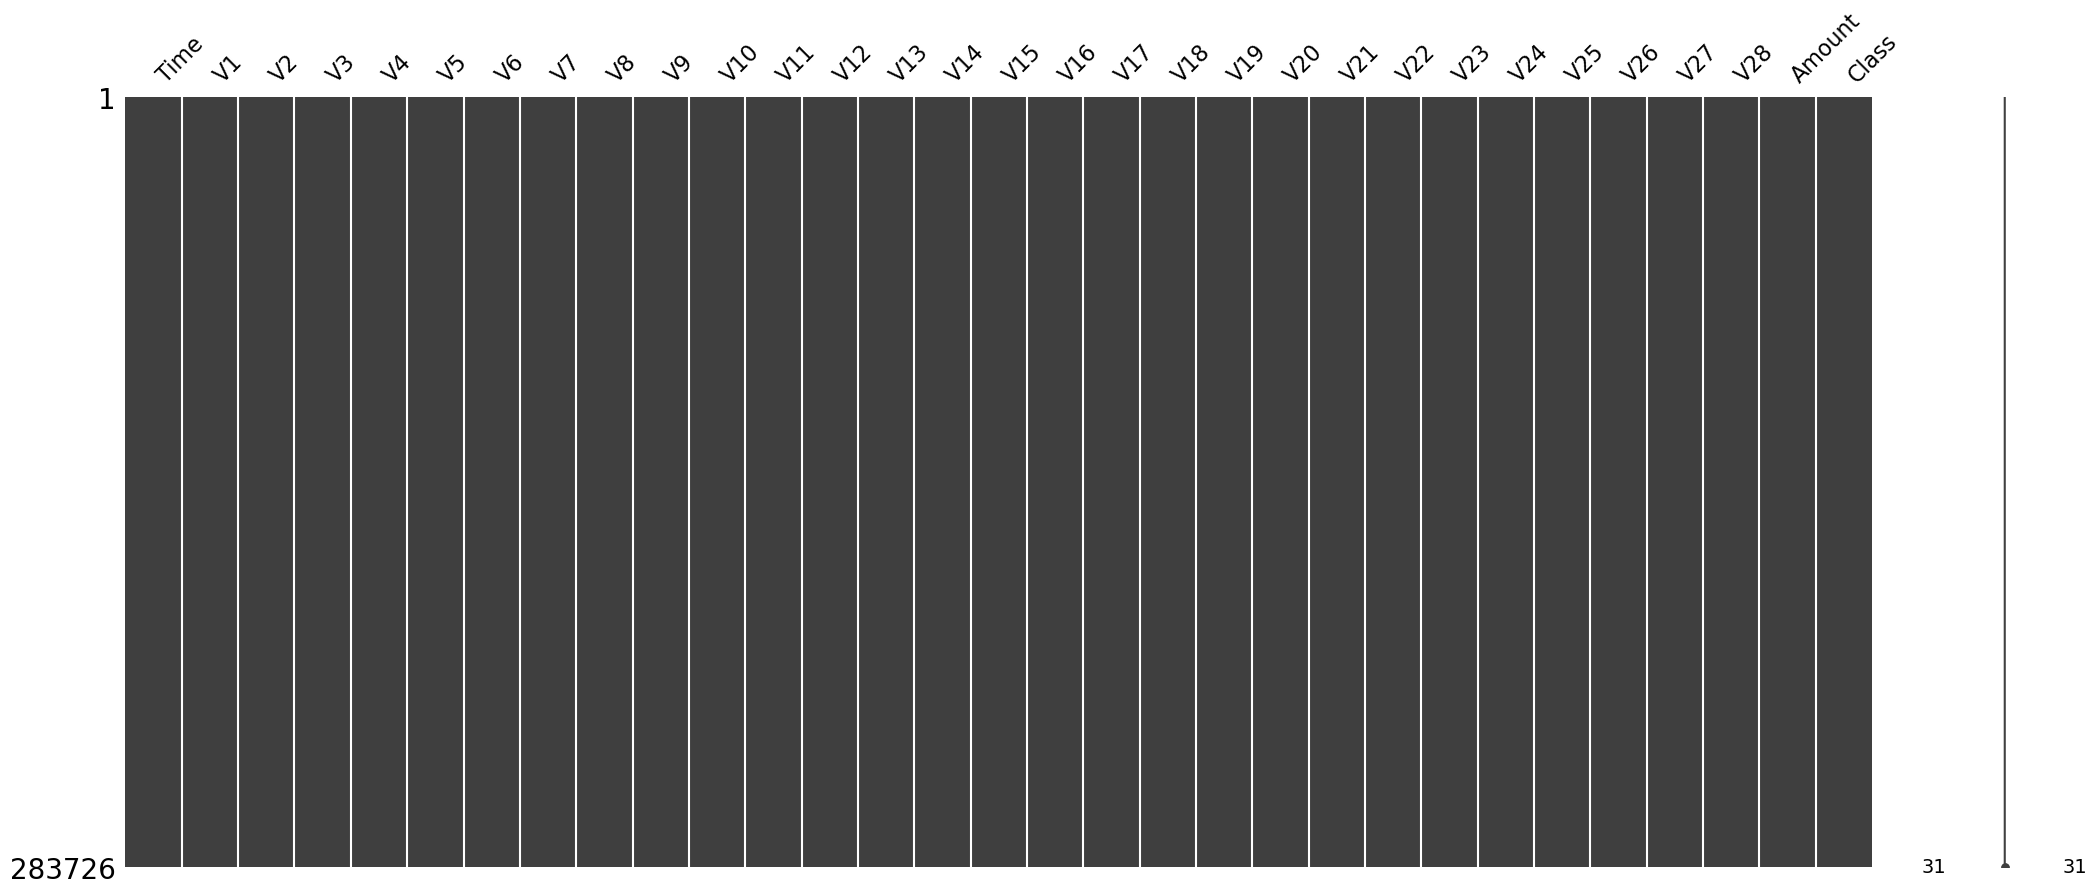

<Figure size 1500x900 with 0 Axes>

In [14]:
import missingno as msno

msno.matrix(df)
plt.figure(figsize = (15,9))
plt.show()

 Insight:
 - Our data Doesn't have missing data.


Let us better try to understand our data distribtutions

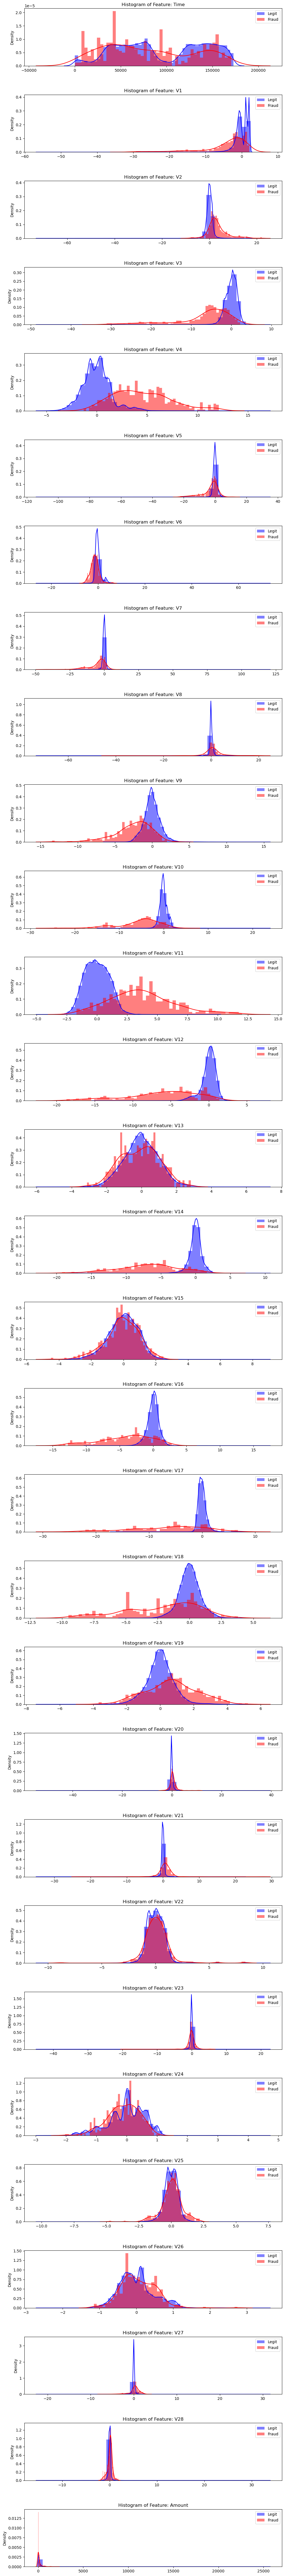

In [15]:
v_features = df.columns[:30]

num_features = len(v_features)
num_rows = num_features

fig, axes = plt.subplots(nrows=num_rows, ncols=1, figsize=(12, num_rows * 4))
fig.subplots_adjust(hspace=0.5) 

for i, feature in enumerate(v_features):
    ax = axes[i] if num_rows > 1 else axes
    
    sns.distplot(df[df['Class'] == 0.0][feature], bins=50, color='b', label='Legit', ax=ax, hist_kws={'alpha': 0.5})
    
    sns.distplot(df[df['Class'] == 1.0][feature], bins=50, color='r', label='Fraud', ax=ax, hist_kws={'alpha': 0.5})
    
    ax.set_xlabel('')
    ax.set_ylabel('Density')
    ax.set_title('Histogram of Feature: ' + feature)
    ax.legend()

plt.show()

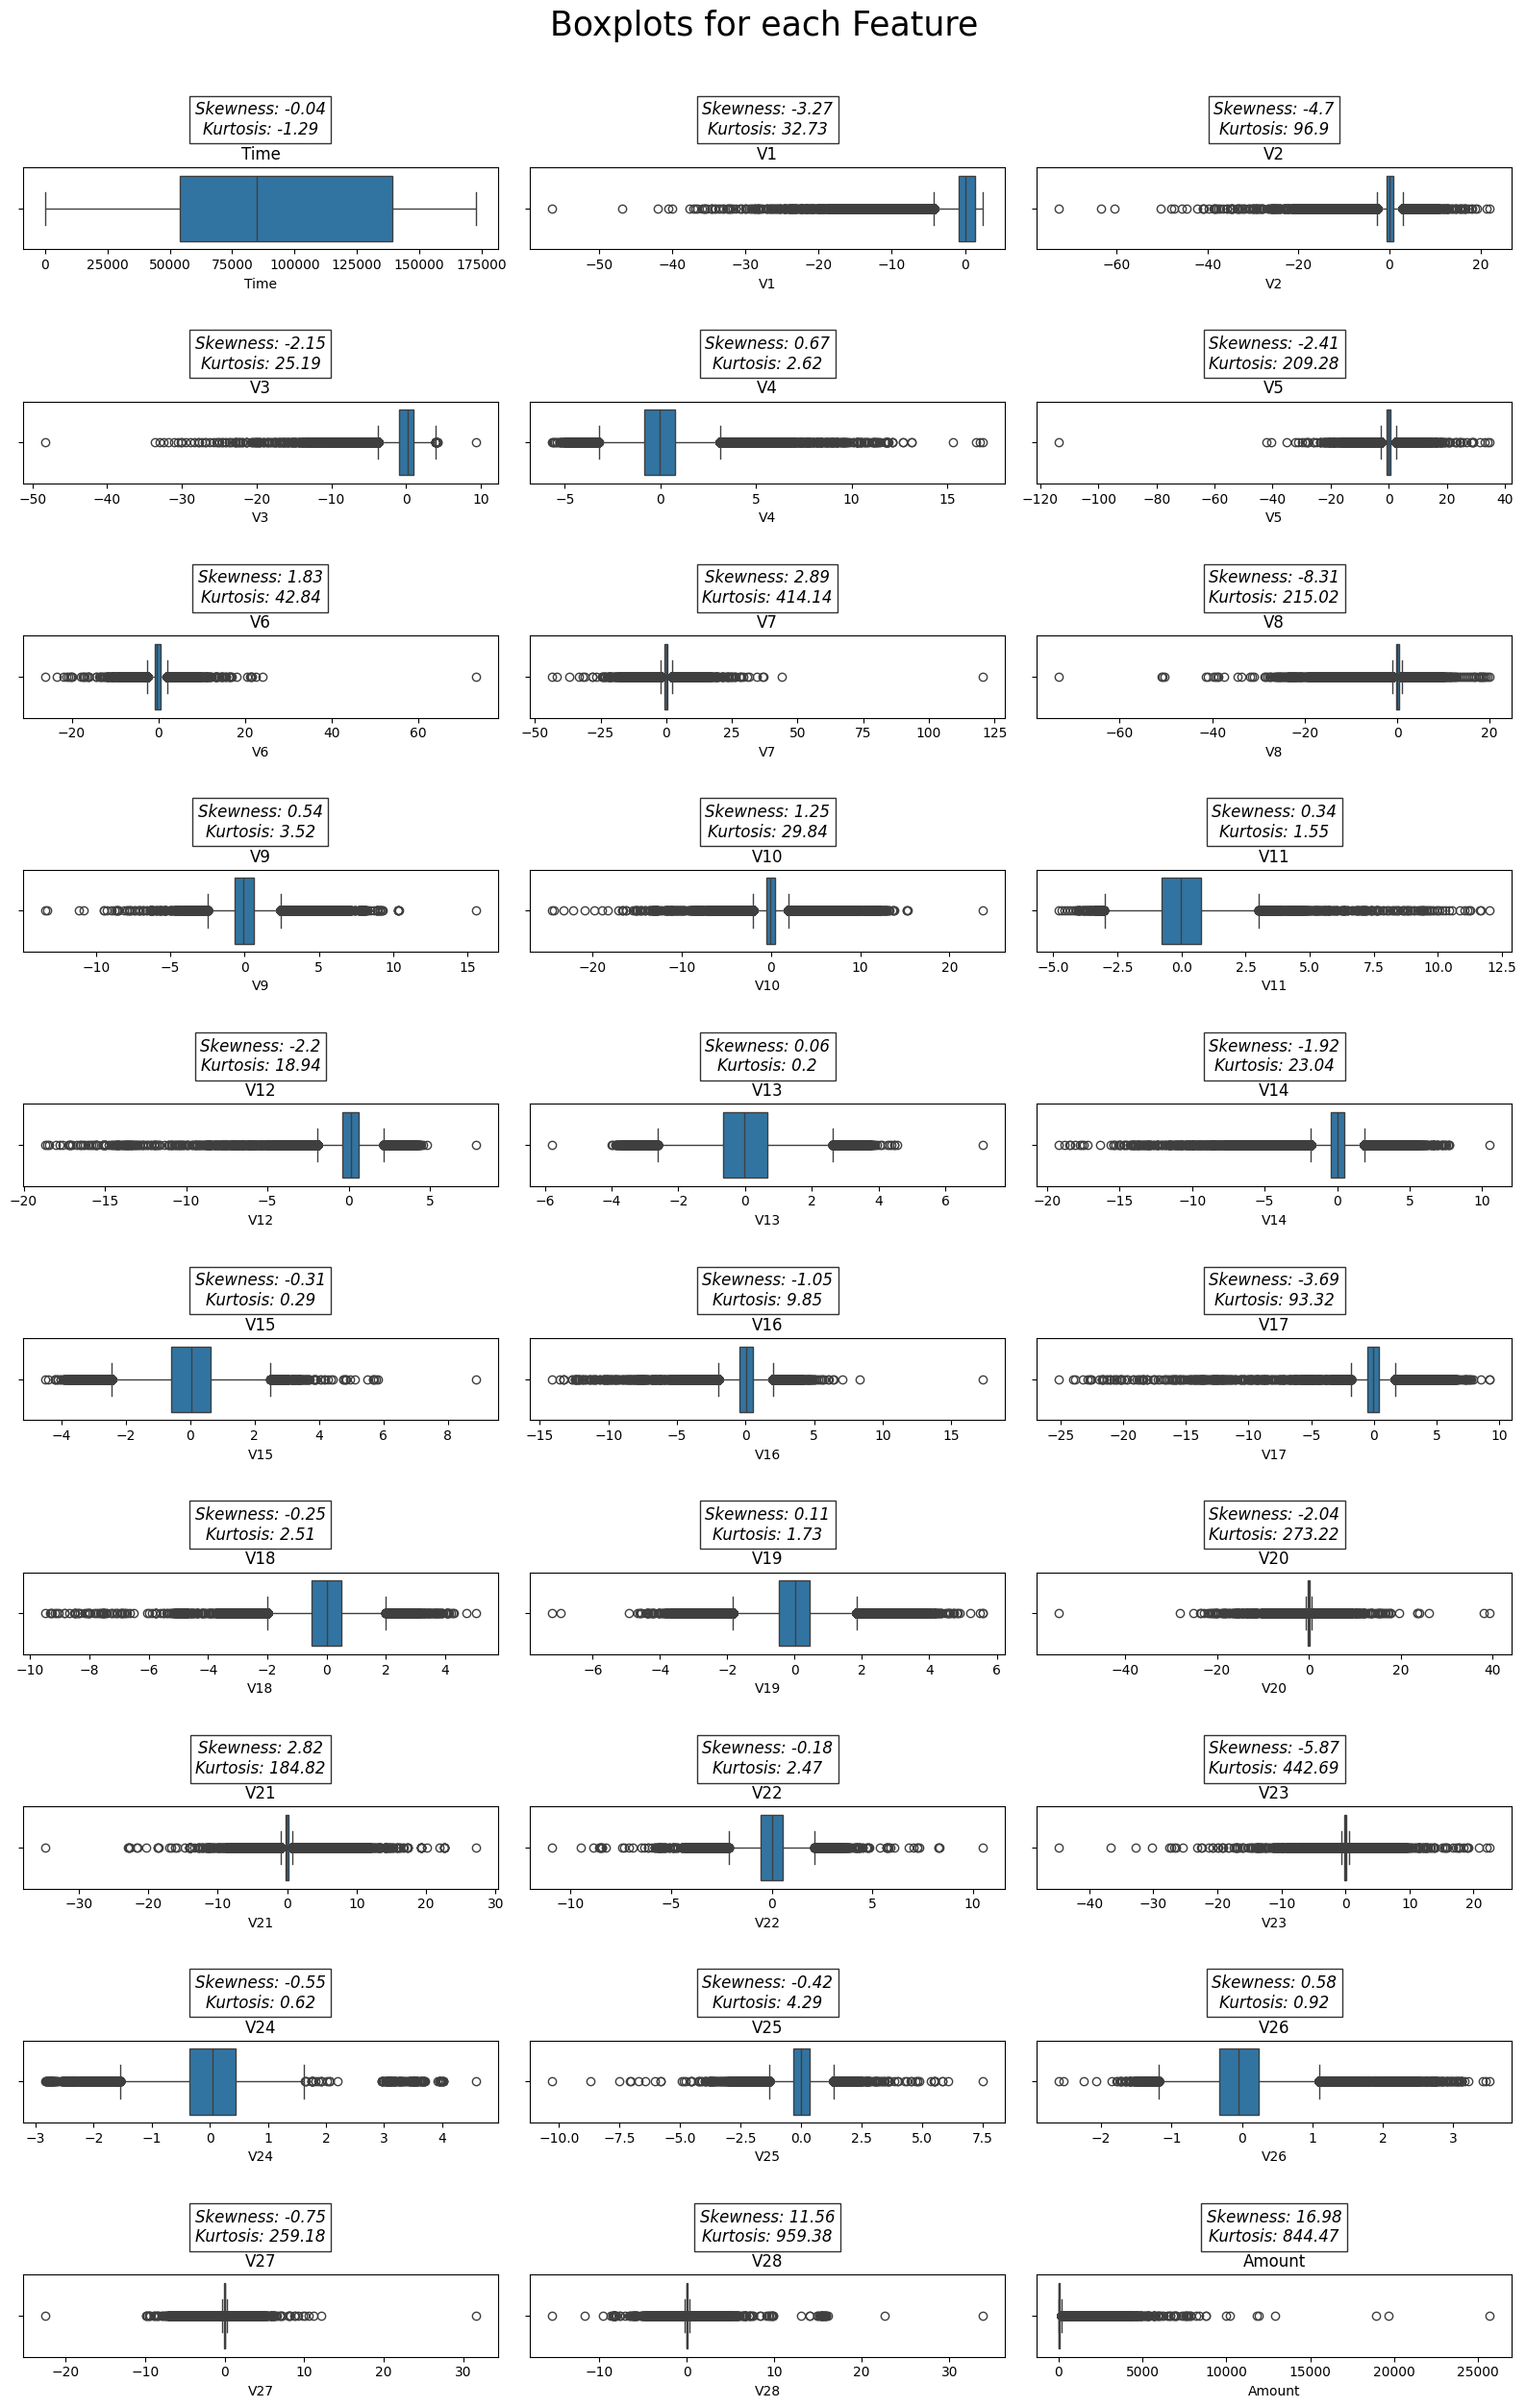

In [ ]:
numeric_columns = list(df.loc[:, 'Time':'Amount'])

def boxplots_custom(dataset, columns_list, rows, cols, suptitle):
    fig, axs = plt.subplots(rows, cols, sharey=True, figsize=(16, 25))
    fig.suptitle(suptitle, y=1, size=25)
    axs = axs.flatten()
    for i, data in enumerate(columns_list):
        sns.boxplot(data=dataset[data], orient='h', ax=axs[i])
        
        skewness = dataset[data].skew(skipna=True)
        kurtosis = dataset[data].kurt(skipna=True)
        
        axs[i].set_title(data)
        
        axs[i].text(
            0.5, 1.4,
            f'Skewness: {round(skewness, 2)}\nKurtosis: {round(kurtosis, 2)}',
            transform=axs[i].transAxes,
            ha='center',
            fontsize=12,
            color='black', 
            style='italic',
            bbox={'facecolor': 'white', 'edgecolor': 'black', 'alpha': 0.8} 
        )
    
boxplots_custom(df,numeric_columns, 10, 3, suptitle='Boxplots for each Feature')

plt.tight_layout()
plt.show()


Insight:
 - We have huge amounts of outliers
 - We have data with high skewness and kurtosis

# <h1 style="font-family: Trebuchet MS; padding: 20px; font-size: 40px; color: #EF6262; text-align: center; line-height: 0.55;background-color: #262322"><b>Feature Selection</b><br></h1>

First Check the correlation between each feature together

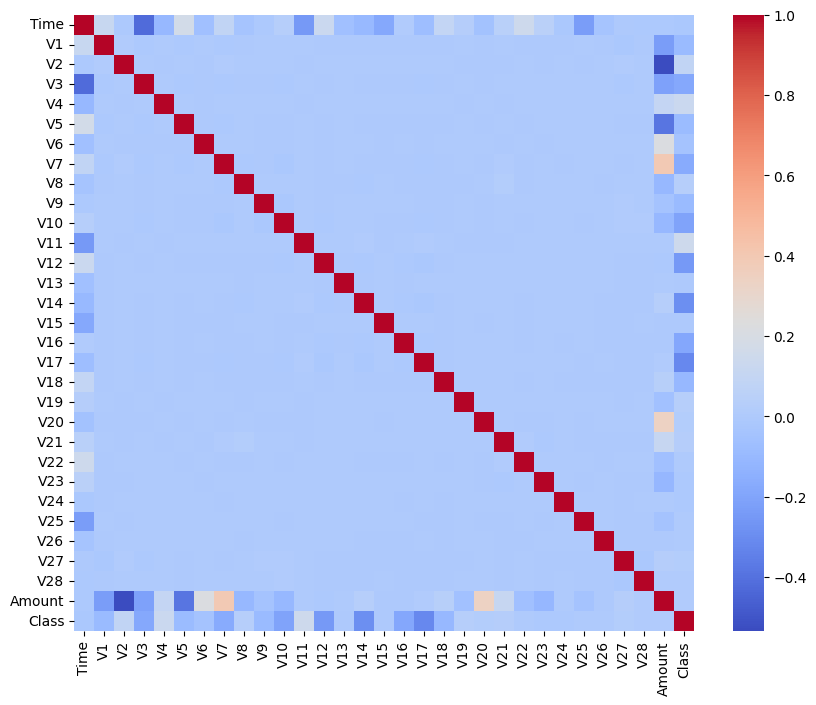

In [ ]:
plt.figure(figsize=(10, 8))
correlation_matrix = df.corr()
heatmap =sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm')
plt.show()

Now we check each feature's correlation with the target variable

In [ ]:
cols = df.columns
corr = []

for col in cols:
    if col != 'Class':
        corr_value = df['Class'].corr(df[col])
        corr.append((col, corr_value))

correlation = pd.DataFrame(corr, columns=['Variables', 'Corr_with_Class'])

correlation

,Variables,Corr_with_Class
0,Time,-0.012359
1,V1,-0.094486
2,V2,0.084624
3,V3,-0.182322
4,V4,0.129326
5,V5,-0.087812
6,V6,-0.043915
7,V7,-0.172347
8,V8,0.033068
9,V9,-0.094021


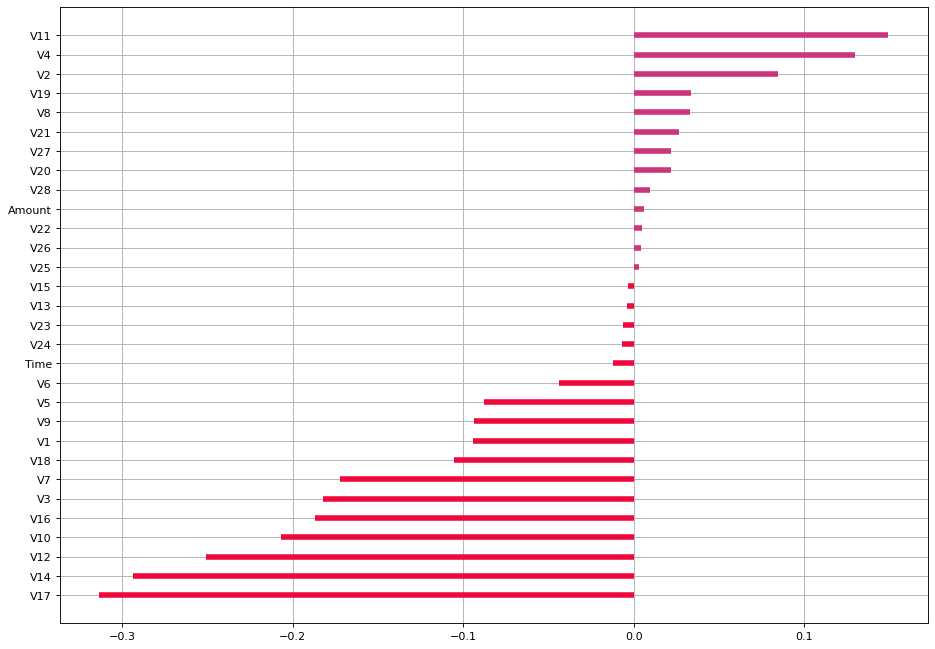

In [ ]:
for i in range(len(correlation)):
    correlation['colors'] = ['#F0073B' if float(x) <= 0 else '#CB3579' for x in correlation['Corr_with_Class']]

correlation = correlation.sort_values(ascending=True, by=['Corr_with_Class'])

plt.figure(figsize=(14,10), dpi=80)

plt.hlines(y=correlation.Variables, xmin=0, xmax=correlation.Corr_with_Class, color=correlation.colors,  linewidth=5)

plt.grid()
plt.show()

Then, let's try Linear Regression Coefficients

In [ ]:
from sklearn.model_selection import train_test_split

x = df.drop('Class', axis=1)
y = df['Class']

x_train2, x_test2, y_train2, y_test2 = train_test_split(x, y, test_size=0.3, random_state=42)

In [ ]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

linear_model = LinearRegression()

rfe = RFE(linear_model, n_features_to_select=1)
rfe.fit(x, y)

ranking = rfe.ranking_

ranking_df = pd.DataFrame({'Feature': x.columns, 'Rank': ranking})

ranking_df = ranking_df.sort_values(by='Rank')

ranking_df


,Feature,Rank
17,V17,1
14,V14,2
12,V12,3
16,V16,4
10,V10,5
11,V11,6
7,V7,7
18,V18,8
3,V3,9
4,V4,10


### From all of the plots shown, I Decided that using feature selection on this dataset that has already been transformed with PCA with the results from our plots may not be the ideal decision for our project


# <h1 style="font-family: Trebuchet MS; padding: 20px; font-size: 40px; color: #EF6262; text-align: center; line-height: 0.55;background-color: #262322"><b>Outlier treatment</b><br></h1>

In [11]:
def remove_outliers(data):
    data_out = data.copy()
    for column in data_out.columns:
        if column != 'Class':
            Q1 = data_out[column].quantile(0.25)
            Q3 = data_out[column].quantile(0.75)
            IQR = Q3 - Q1
            lower_bound = Q1 - 1.5 * IQR
            upper_bound = Q3 + 1.5 * IQR
            data_out = data_out[(data_out[column] >= lower_bound) & (data_out[column] <= upper_bound)]
    
    return data_out

In [12]:
df_out = df.copy()
df_out = remove_outliers(df)
df_out

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
5,2.0,-0.425966,0.960523,1.141109,-0.168252,0.420987,-0.029728,0.476201,0.260314,-0.568671,...,-0.208254,-0.559825,-0.026398,-0.371427,-0.232794,0.105915,0.253844,0.081080,3.67,0
6,4.0,1.229658,0.141004,0.045371,1.202613,0.191881,0.272708,-0.005159,0.081213,0.464960,...,-0.167716,-0.270710,-0.154104,-0.780055,0.750137,-0.257237,0.034507,0.005168,4.99,0
9,9.0,-0.338262,1.119593,1.044367,-0.222187,0.499361,-0.246761,0.651583,0.069539,-0.736727,...,-0.246914,-0.633753,-0.120794,-0.385050,-0.069733,0.094199,0.246219,0.083076,3.68,0
12,10.0,1.249999,-1.221637,0.383930,-1.234899,-1.485419,-0.753230,-0.689405,-0.227487,-2.094011,...,-0.231809,-0.483285,0.084668,0.392831,0.161135,-0.354990,0.026416,0.042422,121.50,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284794,172777.0,-1.266580,-0.400461,0.956221,-0.723919,1.531993,-1.788600,0.314741,0.004704,0.013857,...,-0.157831,-0.883365,0.088485,-0.076790,-0.095833,0.132720,-0.028468,0.126494,0.89,0
284796,172780.0,1.884849,-0.143540,-0.999943,1.506772,-0.035300,-0.613638,0.190241,-0.249058,0.666458,...,0.144008,0.634646,-0.042114,-0.053206,0.316403,-0.461441,0.018265,-0.041068,60.00,0
284797,172782.0,-0.241923,0.712247,0.399806,-0.463406,0.244531,-1.343668,0.929369,-0.206210,0.106234,...,-0.228876,-0.514376,0.279598,0.371441,-0.559238,0.113144,0.131507,0.081265,5.49,0
284800,172784.0,2.039560,-0.175233,-1.196825,0.234580,-0.008713,-0.726571,0.017050,-0.118228,0.435402,...,-0.268048,-0.717211,0.297930,-0.359769,-0.315610,0.201114,-0.080826,-0.075071,2.68,0


In [13]:
df_out.shape

(109832, 31)

In [14]:
print ('The amount of frauds in df before dropping outliers: ', len(df[df['Class'] == 1.0]))
print ('The amount of frauds in df after dropping outliers: ', len(df_out[df_out['Class'] == 1.0]))

percentage_info_loss = ((len(df[df['Class'] == 1.0]) - len(df_out[df_out['Class'] == 1.0])) / len(df[df['Class'] == 1.0])) * 100

print('The percentage of information loss: {:.2f}%'.format(percentage_info_loss))

The amount of frauds in df before dropping outliers:  473
The amount of frauds in df after dropping outliers:  13
The percentage of information loss: 97.25%


In [15]:
print ('The amount of Legit in df before dropping outliers: ', len(df[df['Class'] == 0.0]))
print ('The amount of Legit in df after dropping outliers: ', len(df_out[df_out['Class'] == 0.0]))

percentage_info_loss = ((len(df[df['Class'] == 0.0]) - len(df_out[df_out['Class'] == 0.0])) / len(df[df['Class'] == 0.0])) * 100

print('The percentage of information loss: {:.2f}%'.format(percentage_info_loss))

The amount of Legit in df before dropping outliers:  283253
The amount of Legit in df after dropping outliers:  109819
The percentage of information loss: 61.23%


Insight:
 - This is why we won't remove any outliers in our dataframe As we can see the information loss is too much.

# <h1 style="font-family: Trebuchet MS; padding: 20px; font-size: 40px; color: #EF6262; text-align: center; line-height: 0.55;background-color: #262322"><b>Data Balancing</b><br></h1>

In [39]:
from sklearn.model_selection import train_test_split

x = df.drop('Class', axis=1)
y = df['Class']

x_train, x_temp, y_train, y_temp = train_test_split(x, y, test_size=0.3, random_state=42)
x_valid, x_test, y_valid, y_test = train_test_split(x_temp, y_temp, test_size=0.5, random_state=42)

In [ ]:
# Add feature scaling
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_valid_scaled = scaler.transform(x_valid)
x_test_scaled = scaler.transform(x_test)

In [40]:
value_counts = y_train.value_counts()

count_0 = value_counts.get(0, 0)
count_1 = value_counts.get(1, 0)

print("Number of rows for each class without sampling:")
print("Number of legits =>", count_0)
print("Number of frauds =>", count_1)

Number of rows for each class without sampling: 198269
Number of legits => 198269
Number of frauds => 339


In [41]:
from imblearn.under_sampling import RandomUnderSampler, TomekLinks

TL=TomekLinks(n_jobs=-1)

x_train_resampled, y_train_resampled = TL.fit_resample(x_train, y_train)

In [42]:
value_counts = y_train_resampled.value_counts()

count_0 = value_counts.get(0, 0)
count_1 = value_counts.get(1, 0)

print("Number of rows for each class after TomekLinks:")
print("Number of legits =>", count_0)
print("Number of frauds =>", count_1)

Number of rows for each class after TomekLinks:
Number of legits => 198216
Number of frauds => 339


##### 53 enteries were on the boundaries removed by our tomeklinks which will better the distinction between 2 classes

In [43]:
RUS  = RandomUnderSampler(random_state=42,sampling_strategy=0.055)

x_train_resampled2, y_train_resampled2 = RUS.fit_resample(x_train_resampled, y_train_resampled)

In [44]:
value_counts = y_train_resampled2.value_counts()

count_0 = value_counts.get(0, 0)
count_1 = value_counts.get(1, 0)

print("Number of rows for each class after random undersampling:")
print("Number of legits =>", count_0)
print("Number of frauds =>", count_1)

Number of rows for each class after random undersampling:
Number of legits => 6163
Number of frauds => 339


In [45]:
from imblearn.over_sampling import SMOTE

smote = SMOTE()

# fit predictor and target variable
x_smote, y_smote = smote.fit_resample(x_train_resampled2, y_train_resampled2)

In [46]:
value_counts = y_smote.value_counts()

count_0 = value_counts.get(0, 0)
count_1 = value_counts.get(1, 0)

print("Number of rows for each class after SMOTE Sampling:")
print("Number of legits =>", count_0)
print("Number of frauds =>", count_1)

Number of rows for each class after SMOTE Sampling:
Number of legits => 6163
Number of frauds => 6163


# <h1 style="font-family: Trebuchet MS; padding: 20px; font-size: 40px; color: #EF6262; text-align: center; line-height: 0.55;background-color: #262322"><b>Modeling</b><br></h1>

In [69]:
from sklearn import metrics
from sklearn.metrics import f1_score, make_scorer,accuracy_score,confusion_matrix,ConfusionMatrixDisplay,roc_auc_score,RocCurveDisplay,classification_report,precision_recall_curve,roc_curve, auc
from sklearn.model_selection import cross_val_score, GridSearchCV ,RepeatedStratifiedKFold,learning_curve,validation_curve
from sklearn.utils.multiclass import unique_labels
from imblearn.metrics import geometric_mean_score
from mlxtend.plotting import plot_learning_curves
import joblib

In [ ]:
# Model persistence
import joblib

def save_model(model, filename):
    """Save the trained model to disk"""
    try:
        joblib.dump(model, filename)
        print(f"Model saved successfully to {filename}")
    except Exception as e:
        print(f"Error saving model: {e}")

def load_model(filename):
    """Load a trained model from disk"""
    try:
        return joblib.load(filename)
    except Exception as e:
        print(f"Error loading model: {e}")
        return None

In [70]:
from imblearn.metrics import geometric_mean_score

def MODEL(classifier, x_train, y_train, x_test, y_test, param_grid):
    # grid search each of our models in order to find best parameters for each model and then extract best parameters
    grid_search = GridSearchCV(estimator=classifier, param_grid=param_grid, scoring='balanced_accuracy', n_jobs=-1)
    grid_search.fit(x_train, y_train)
    best_classifier = grid_search.best_estimator_
    best_classifier.fit(x_train, y_train)
    prediction = best_classifier.predict(x_test)
    best_estimator_name = str(best_classifier).split('(')[0] 
    print("Best Parameters from Grid Search:", grid_search.best_params_)

    #First, we calculate the cross validate score of our model with the best parameters
    c_v = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=42)
    print("Cross Validation Score:", '{0:.2%}'.format(cross_val_score(best_classifier, x_train, y_train, cv=c_v).mean()))

    #Second we calculate the roc auc score of each class in our model
    roc_auc_scores = []
    for i in range(len(np.unique(y_test))):
        class_y_test = (y_test == i).astype(int)
        class_prediction = (prediction == i).astype(int)
        roc_auc_scores.append(roc_auc_score(class_y_test, class_prediction))

    overall_roc_auc = roc_auc_score(y_test, prediction)

    print("ROC AUC Scores for Each Class:")
    for i, score in enumerate(roc_auc_scores):
        print(f'Class {i} ROC AUC: {score:.2f}')

    #Third we calculate the G-Mean score of each class in our model in order to better understand our evaluation of the classes
    print("G-Mean Score:", '{0:.2%}'.format(geometric_mean_score(y_test, prediction)))
    print("Classification Report:\n", classification_report(y_test, prediction))
    
    fig, ax = plt.subplots(1, 3, figsize=(18, 5))
    for i in range(len(np.unique(y_test))):
        class_y_test = (y_test == i).astype(int)
        class_prediction = (prediction == i).astype(int)

        fpr, tpr, _ = roc_curve(class_y_test, class_prediction)
        roc_auc = auc(fpr, tpr)

        roc_display = RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc)
        ax[0].plot(fpr, tpr, lw=2, label=f'Class {i} (AUC = {roc_auc:.2f})')

    ax[0].plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    ax[0].set_xlim([0.0, 1.0])
    ax[0].set_ylim([0.0, 1.05])
    ax[0].set_xlabel('False Positive Rate')
    ax[0].set_ylabel('True Positive Rate')
    ax[0].set_title(f'ROC_AUC Plot for ({best_estimator_name})')
    ax[0].legend(loc="best")

    ax[0].text(0.6, 0.2, f'Overall ROC AUC: {overall_roc_auc:.2f}', transform=ax[0].transAxes)

    confusion_matrix = metrics.confusion_matrix(y_test, prediction)
    accuracy = accuracy_score(y_test, prediction)
    misclassification_rate = 1 - accuracy

    cm_display = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix, display_labels=['Legit','Fraud'])
    cm_display.plot(cmap=plt.cm.Blues, ax=ax[1])

    ax[1].set_xlabel(f'Predicted label \nAccuracy: {accuracy:.2%}  Misclass Rate: {misclassification_rate:.2%}')
    ax[1].set_title(f'Confusion Matrix')

    train_sizes, train_scores, test_scores = learning_curve(
    best_classifier, x_train, y_train, cv=c_v, n_jobs=-1, 
    train_sizes=np.linspace(0.3, 1.0, 10), scoring='balanced_accuracy')


    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    
    ax[2].grid()
    ax[2].set_title(f'Learning Curve for ({best_estimator_name})')
    ax[2].set_xlabel("Training examples")
    ax[2].set_ylabel("Score")
    ax[2].fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1, color="r")
    ax[2].fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.1, color="g")
    ax[2].plot(train_sizes, train_scores_mean, color="r", marker='o', label="Training score")
    ax[2].plot(train_sizes, test_scores_mean, color="g", marker='o', label="Cross-validation score")
    ax[2].legend(loc="best")

    fig.tight_layout(w_pad=5)
    plt.show()


In [71]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

In [72]:
param_grid_svc = {
    'C': [1, 10, 100],
    'gamma': [1, 0.1, 0.01],
    'kernel': ['linear','rbf'],
    'class_weight': ['balanced','None']
}

param_grid_lr = {
    'penalty' : ['l1', 'l2', 'elasticnet','None'],
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'solver' : ['lbfgs','newton-cg','sag','saga'],
    'max_iter' : [100, 1000, 2500, 5000]
}

param_grid_dt = {
    'criterion': ['entropy', 'gini'],
    'max_depth': [4, 6, 10, 12],
    'max_features': ['sqrt', 'log2']
}

param_grid_rf = {
    'criterion': ['entropy', 'gini'],
    'n_estimators': [50, 100, 200, 500],
    'max_depth': [4, 6, 10, 12],
    'max_features': ['sqrt', 'log2']
}

param_grid_knn = {
    'n_neighbors' : np.arange(1, 21, 2),
    'weights' : ['uniform','distance'],
    'metric' : ['minkowski','euclidean','manhattan']
}

### Support Vector Classifier

Best Parameters from Grid Search: {'C': 1, 'class_weight': 'balanced', 'gamma': 1, 'kernel': 'linear'}
Cross Validation Score: 98.53%
ROC AUC Scores for Each Class:
Class 0 ROC AUC: 0.94
Class 1 ROC AUC: 0.94
G-Mean Score: 94.36%
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.99      1.00     42491
           1       0.16      0.90      0.27        68

    accuracy                           0.99     42559
   macro avg       0.58      0.94      0.64     42559
weighted avg       1.00      0.99      1.00     42559



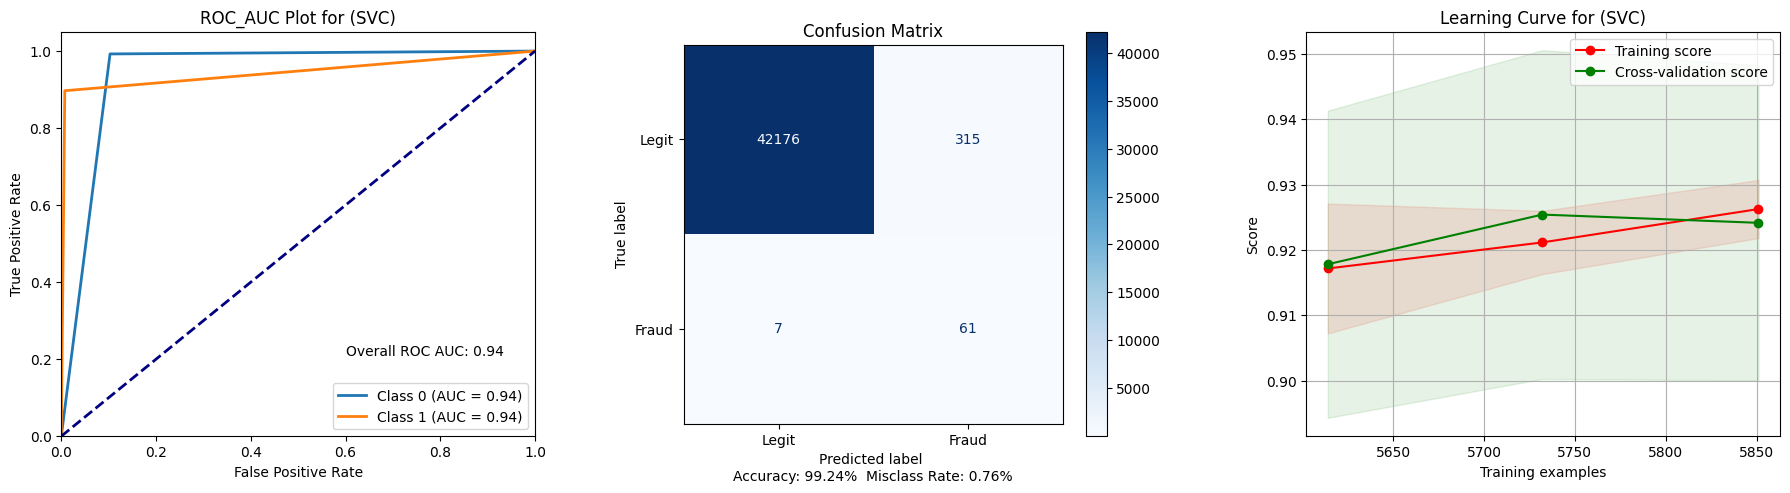

In [ ]:
classifier_svc = SVC(random_state=42)

MODEL(classifier_svc, x_train_resampled, y_train_resampled, x_test, y_test, param_grid_svc)

### Logisitic Regression

Best Parameters from Grid Search: {'C': 1, 'max_iter': 100, 'penalty': 'l2', 'solver': 'newton-cg'}
Cross Validation Score: 99.06%
ROC AUC Scores for Each Class:
Class 0 ROC AUC: 0.93
Class 1 ROC AUC: 0.93
G-Mean Score: 92.28%
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     42491
           1       0.44      0.85      0.58        68

    accuracy                           1.00     42559
   macro avg       0.72      0.93      0.79     42559
weighted avg       1.00      1.00      1.00     42559



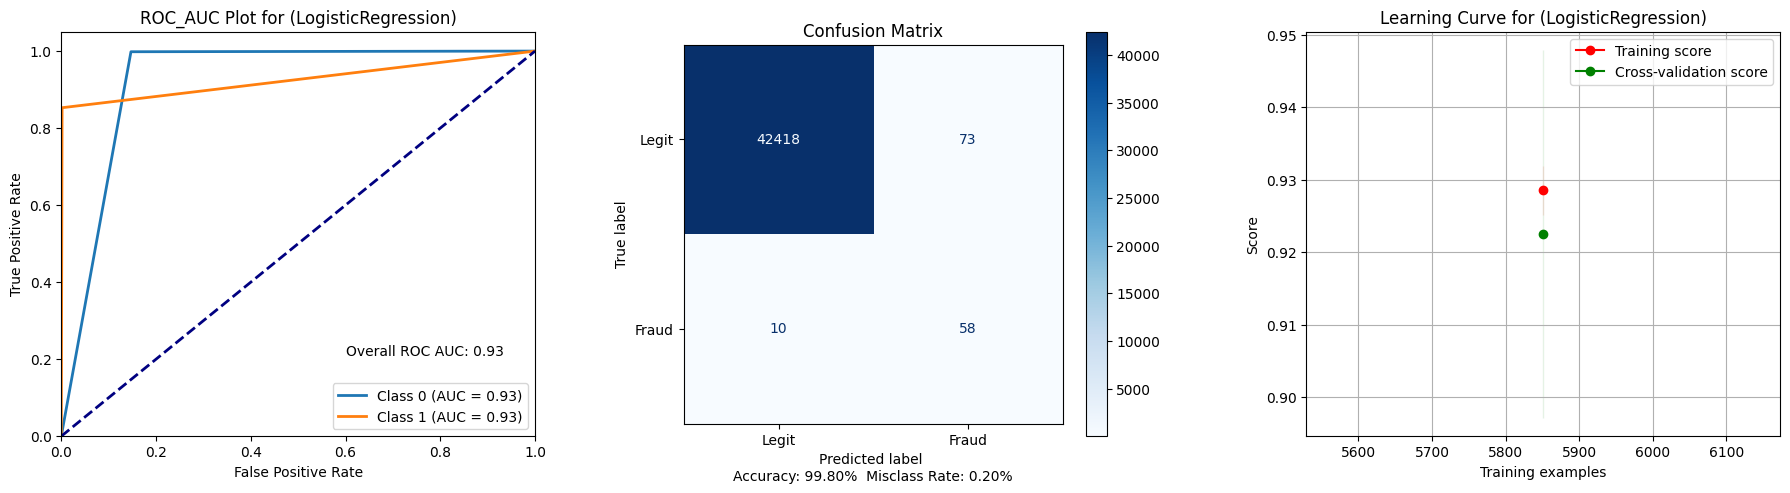

In [36]:
classifier_lr = LogisticRegression(random_state = 42)

MODEL(classifier_lr, x_train_resampled, y_train_resampled, x_test, y_test, param_grid_lr)

### Decision Tree

Best Parameters from Grid Search: {'criterion': 'entropy', 'max_depth': 10, 'max_features': 'sqrt'}
Cross Validation Score: 98.52%
ROC AUC Scores for Each Class:
Class 0 ROC AUC: 0.89
Class 1 ROC AUC: 0.89
G-Mean Score: 88.07%
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     42491
           1       0.20      0.78      0.32        68

    accuracy                           0.99     42559
   macro avg       0.60      0.89      0.66     42559
weighted avg       1.00      0.99      1.00     42559



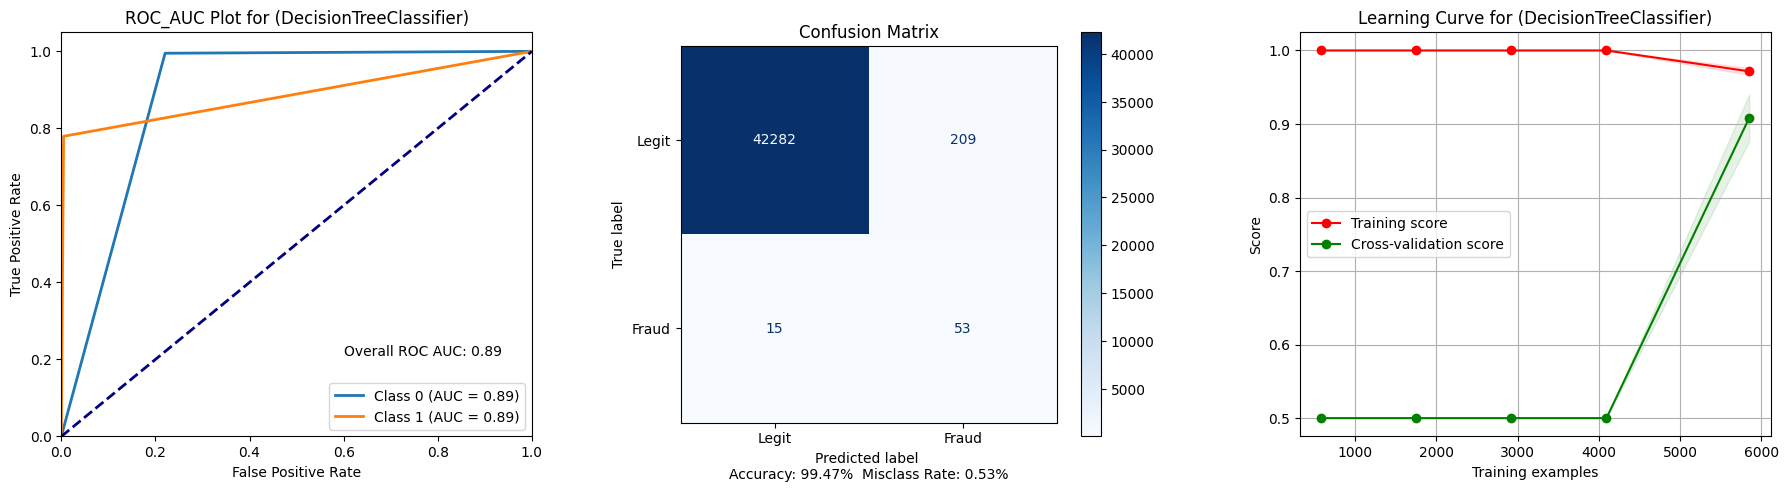

In [59]:
classifier_dt = DecisionTreeClassifier(random_state = 42)

MODEL(classifier_dt, x_train_resampled, y_train_resampled, x_test, y_test, param_grid_dt)

### Random Forest Tree

Best Parameters from Grid Search: {'criterion': 'entropy', 'max_depth': 10, 'max_features': 'sqrt', 'n_estimators': 200}
Cross Validation Score: 99.16%
ROC AUC Scores for Each Class:
Class 0 ROC AUC: 0.93
Class 1 ROC AUC: 0.93
G-Mean Score: 92.33%
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     42491
           1       0.71      0.85      0.77        68

    accuracy                           1.00     42559
   macro avg       0.85      0.93      0.89     42559
weighted avg       1.00      1.00      1.00     42559



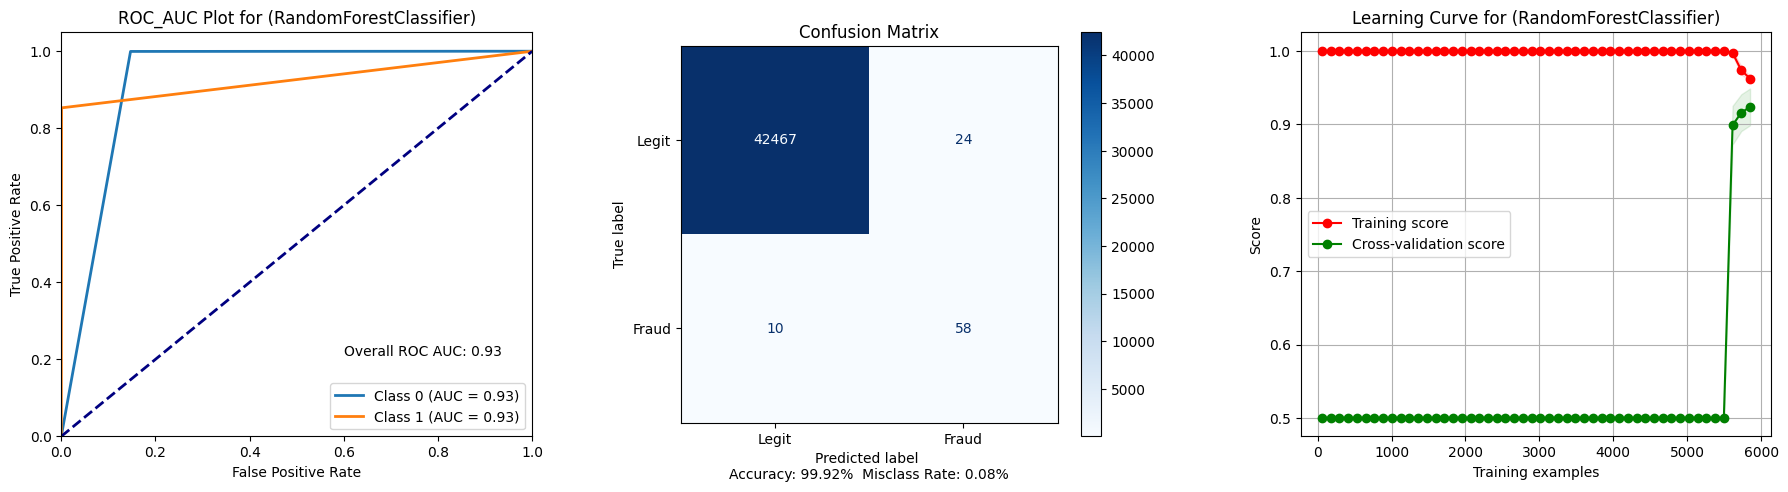

In [ ]:
classifier_rf = RandomForestClassifier(random_state = 42)

MODEL(classifier_rf,x_train_resampled, y_train_resampled, x_test, y_test, param_grid_rf)

### K Means Classifier

Best Parameters from Grid Search: {'metric': 'manhattan', 'n_neighbors': 1, 'weights': 'uniform'}
Cross Validation Score: 95.21%
ROC AUC Scores for Each Class:
Class 0 ROC AUC: 0.62
Class 1 ROC AUC: 0.62
G-Mean Score: 49.62%
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.98      0.99     42491
           1       0.03      0.25      0.05        68

    accuracy                           0.98     42559
   macro avg       0.51      0.62      0.52     42559
weighted avg       1.00      0.98      0.99     42559



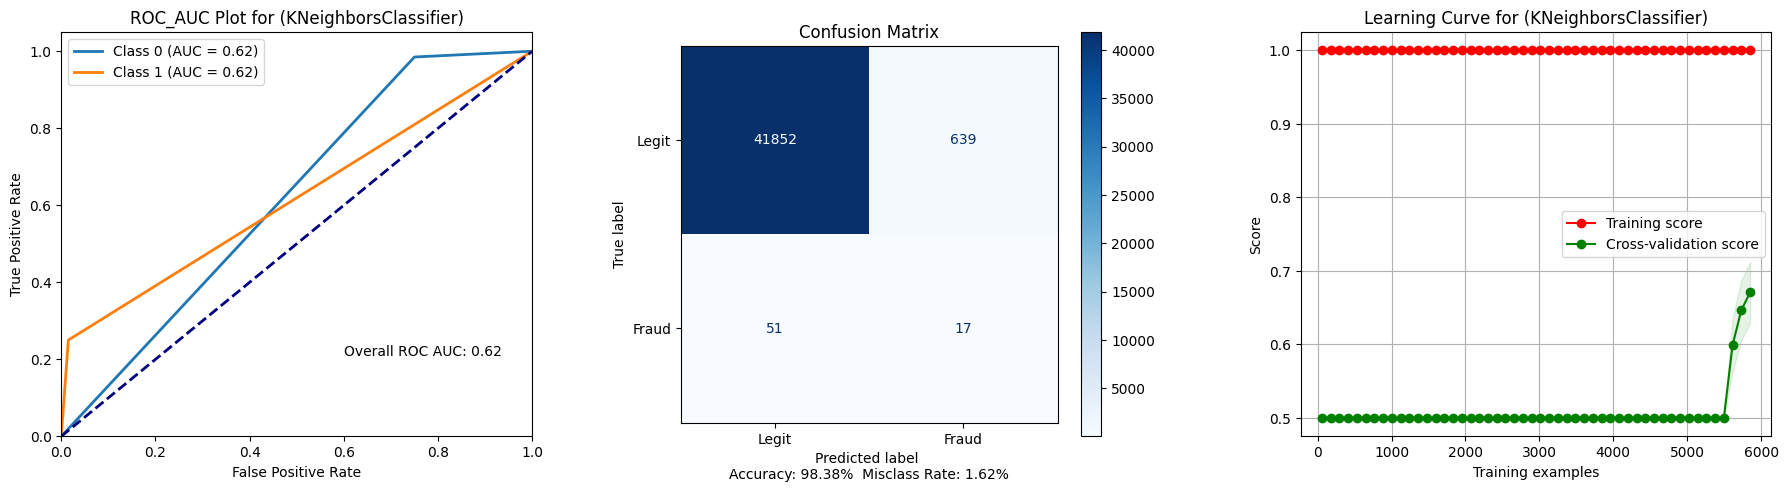

In [ ]:
classifier_knn = KNeighborsClassifier()

MODEL(classifier_knn,x_train_resampled, y_train_resampled, x_test, y_test, param_grid_knn)

### ANN Model

In [ ]:
import optuna
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Define a global variable to store the best model's path
best_model_path = 'best_model.h5'

def create_ann_model(trial):
    model = keras.Sequential()

    # Number of hidden layers
    n_layers = trial.suggest_int('n_layers', 1, 10)
    
    for i in range(n_layers):
        units = trial.suggest_int(f'n_units_{i}', 8, 128)
        model.add(Dense(units, activation='relu'))
        
        dropout_prob = trial.suggest_float(f'dropout_{i}', 0.2, 0.6)
        model.add(Dropout(rate=dropout_prob))

    model.add(Dense(1, activation='sigmoid'))
    
    optimizer_name = trial.suggest_categorircal('optimizer', ['Adam', 'SGD', 'RMSprop', 'Adagrad']) #type of diffrent we are going to try

    if optimizer_name == 'Adam':
        lr = trial.suggest_float('adam_learning_rate', 1e-5, 1e-1, log=True)
        optimizer = keras.optimizers.Adam(learning_rate=lr)
    elif optimizer_name == 'SGD':
        lr = trial.suggest_float('sgd_learning_rate', 1e-5, 1e-1, log=True)
        optimizer = keras.optimizers.SGD(learning_rate=lr)
    elif optimizer_name == 'RMSprop':
        lr = trial.suggest_float('rmsprop_learning_rate', 1e-5, 1e-1, log=True)
        optimizer = keras.optimizers.RMSprop(learning_rate=lr)
    elif optimizer_name == 'Adagrad':
        lr = trial.suggest_float('adagrad_learning_rate', 1e-5, 1e-1, log=True)
        optimizer = keras.optimizers.Adagrad(learning_rate=lr)

    model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])
    return model

def objective(trial):
    model = create_ann_model(trial)

    early_stopping = tf.keras.callbacks.EarlyStopping(
        monitor='val_loss',
        patience=3,
        restore_best_weights=True
    )

    history = model.fit(
        x_train_resampled, y_train_resampled,
        validation_data=(x_valid, y_valid),
        epochs=30, batch_size=32,
        verbose=0,
        callbacks=[early_stopping]
    )

    val_loss, val_accuracy = model.evaluate(x_valid, y_valid, verbose=0)

    model.save(best_model_path)

    return val_accuracy

# Create and run the study with more trials
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=51)

# Check if the study is completed
if study.best_trial is not None:
    print('Best trial:')
    trial = study.best_trial
    print('Value: ', trial.value)
    print('Params: ')
    for key, value in trial.params.items():
        print(f'    {key}: {value}')
    
    # Load the best model and evaluate
    best_model = keras.models.load_model(best_model_path)
    val_loss, val_accuracy = best_model.evaluate(x_valid, y_valid, verbose=0)
    print(f'Validation Accuracy of the Best Model: {val_accuracy}')
else:
    print("No trials have been completed yet.")


[I 2024-03-28 14:27:07,176] A new study created in memory with name: no-name-3b11d464-3724-43b9-a98e-bde28c6b30a3
[I 2024-03-28 14:29:21,624] Trial 0 finished with value: 0.9984492063522339 and parameters: {'n_layers': 10, 'n_units_0': 69, 'dropout_0': 0.5506422573322884, 'n_units_1': 11, 'dropout_1': 0.2992362251842931, 'n_units_2': 14, 'dropout_2': 0.21608881754876236, 'n_units_3': 22, 'dropout_3': 0.5022142139011264, 'n_units_4': 39, 'dropout_4': 0.5052288869015806, 'n_units_5': 14, 'dropout_5': 0.4568145535877821, 'n_units_6': 10, 'dropout_6': 0.49437579790943575, 'n_units_7': 25, 'dropout_7': 0.2996814840345781, 'n_units_8': 39, 'dropout_8': 0.48818370429491975, 'n_units_9': 46, 'dropout_9': 0.23559523070530825, 'optimizer': 'SGD', 'sgd_learning_rate': 0.00018885244591610988}. Best is trial 0 with value: 0.9984492063522339.
[I 2024-03-28 14:29:43,639] Trial 1 finished with value: 0.9984492063522339 and parameters: {'n_layers': 10, 'n_units_0': 27, 'dropout_0': 0.5914146536252355, 

Best trial:
Value:  0.9984492063522339
Params: 
    n_layers: 10
    n_units_0: 69
    dropout_0: 0.5506422573322884
    n_units_1: 11
    dropout_1: 0.2992362251842931
    n_units_2: 14
    dropout_2: 0.21608881754876236
    n_units_3: 22
    dropout_3: 0.5022142139011264
    n_units_4: 39
    dropout_4: 0.5052288869015806
    n_units_5: 14
    dropout_5: 0.4568145535877821
    n_units_6: 10
    dropout_6: 0.49437579790943575
    n_units_7: 25
    dropout_7: 0.2996814840345781
    n_units_8: 39
    dropout_8: 0.48818370429491975
    n_units_9: 46
    dropout_9: 0.23559523070530825
    optimizer: SGD
    sgd_learning_rate: 0.00018885244591610988
Validation Accuracy of the Best Model: 0.9984492063522339


# <h1 style="font-family: Trebuchet MS; padding: 20px; font-size: 40px; color: #EF6262; text-align: center; line-height: 0.55;background-color: #262322"><b>Conclusion</b><br></h1>

### ML models results: 

|Sr. No.|ML Algorithm|Cross Validation Score|ROC AUC Score|F1 Score (Fraud)|GMean Score
|-|-|-|-|-|-|
|1|Support Vector Classifier|91.08%|89.68%|75%|90.54%|
|2|Logistic Regression|97.62%|89.69%|79%|90.65%|
|3|Decision Tree Classifier|90.69%|91.12%|66%|90.15%|
|4|Random forest Tree Classifier|97.48%|93.37%|84%|91.87%|
|5|K-Nearest Neighbors|93.52%|91.89%|79%|92.41%|
|6|ANN|93.52%|91.89%|79%|92.41%|

Insight:
 - From the table we seen that the model with the best tradeoff is our RF model.

In [ ]:
# #Save our model for any furthur usage

# model_filename = 'Final_Model1.pkl'
# joblib.dump(classifier_rf, model_filename)